In [101]:
import math
import  pandas as pd
import time
import cv2
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'figure.figsize': (15, 10)})
plt.style.use('dark_background')


In [102]:
def takeImage():
   cam = cv2.VideoCapture(0)
   cv2.namedWindow("test")
   # take image on pressing 'space'
   while True:
      ret, frame = cam.read()
      cv2.imshow("test", frame)
      if not ret:
         break
      k = cv2.waitKey(1)

      if k%256 == 32:
         # SPACE pressed
         img_name = "images/takenImage.jpg"
         cv2.imwrite(img_name, frame)
         print("{} written!".format(img_name))
         break
   cam.release()
   cv2.destroyAllWindows()

   return frame


def showImgs(imgs, n_imgs, i_imgs):
   n = sqrt(n_imgs)
   m = n
   p = 1
   if n != int(n):
      n = int(n)
      m = n + 1
   print("n, m", n, m)
   fig = plt.figure()
   for i in i_imgs:
      fig.add_subplot(int(n), int(m), p)
      plt.imshow(imgs[i], cmap='gray')
      plt.axis('off')
      p += 1

def convertToEigenFaces(img):
   # Using the PCA algorithm
   pca = PCA(svd_solver='full', n_components=40)
   pca.fit(img)
   print(pca.components_.shape)
   print(img.shape) # (480, 640)
   best_eigenfaces = []
   for eigenface in pca.components_[0 : 40]:
      best_eigenfaces.append(eigenface.reshape( 32, -1)) #32 20

   showImgs(best_eigenfaces, 40, range(40))
   df = pd.DataFrame(pca.components_, columns=list(img[0]))
   print(df)
   plt.show()

   return best_eigenfaces


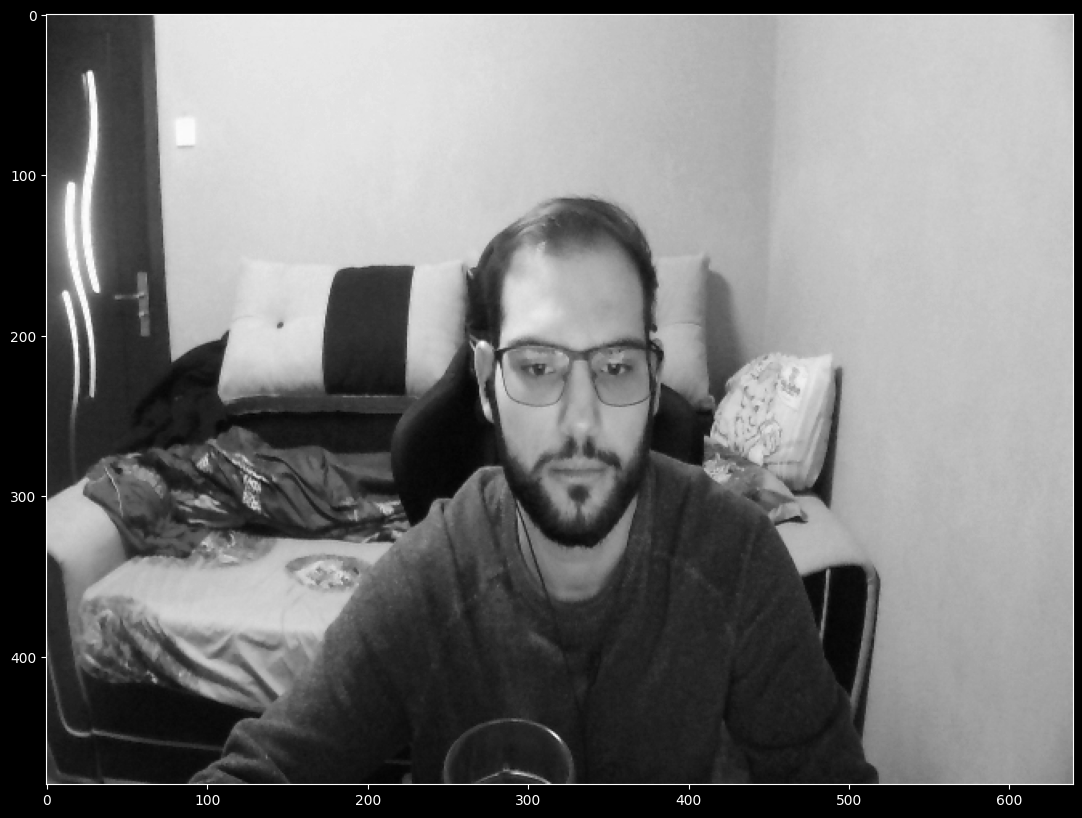

(40, 640)
(480, 640)
n, m 6 7
         43        43        43        44        44        43        43   \
0  -0.001289 -0.001981 -0.002690 -0.003462 -0.004253 -0.004995 -0.005557   
1  -0.001189 -0.000773 -0.000941 -0.001297 -0.001596 -0.001755 -0.001695   
2  -0.006574 -0.007028 -0.007334 -0.007807 -0.007843 -0.007622 -0.007449   
3   0.097044  0.099197  0.102188  0.105806  0.109204  0.114093  0.118395   
4   0.002010  0.002420  0.002910  0.004242  0.005412  0.006318  0.007582   
5  -0.029119 -0.029449 -0.028664 -0.029035 -0.029526 -0.030088 -0.030495   
6  -0.039729 -0.040894 -0.041904 -0.042445 -0.041304 -0.041909 -0.041391   
7  -0.035950 -0.035678 -0.034885 -0.034717 -0.034588 -0.034330 -0.031504   
8  -0.036460 -0.030486 -0.023078 -0.016823 -0.008613  0.001761  0.007567   
9   0.042469  0.036096  0.028905  0.021842  0.015135  0.003475 -0.007670   
10  0.004355  0.008897  0.012337  0.018497  0.027723  0.034999  0.037575   
11  0.045200  0.051590  0.055675  0.054172  0.055058  0.06

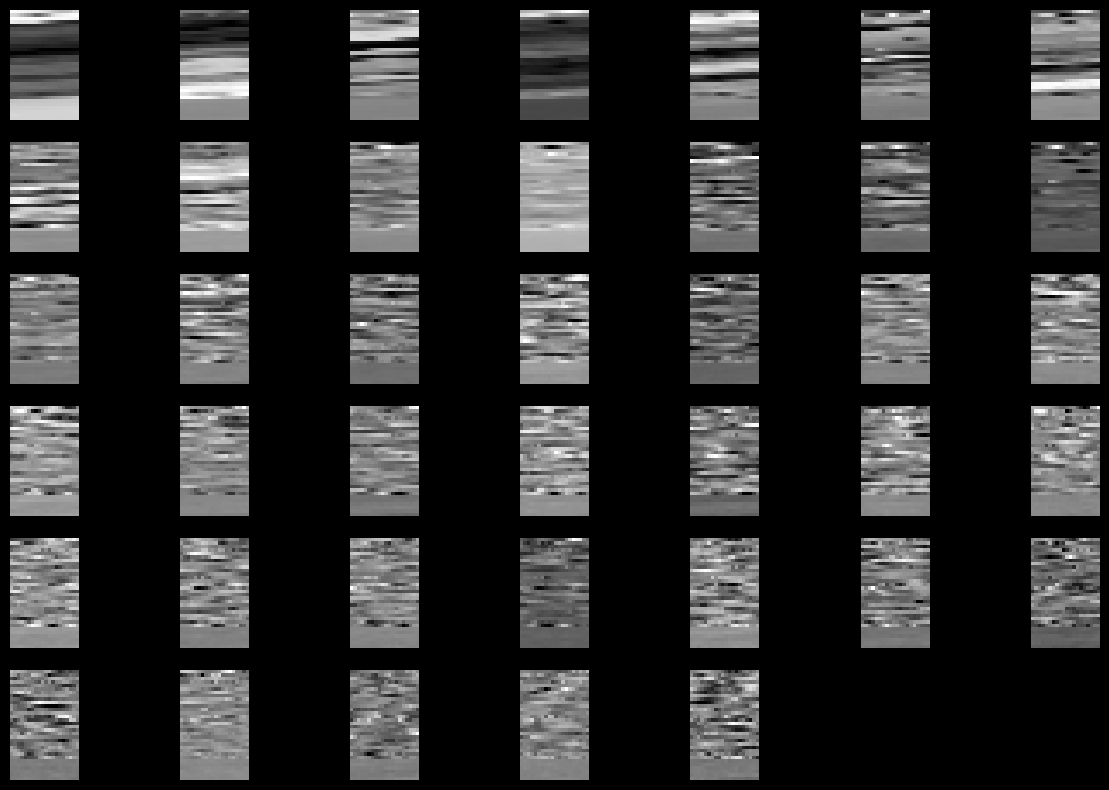

In [103]:
img = cv2.imread('images/img1.jpg', cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (640, 480), fx=0.5, fy=0.5)

# show the sample image
plt.imshow(img, cmap='gray')
plt.show()

oEigen = convertToEigenFaces(img)
plt.show()


images/takenImage.jpg written!


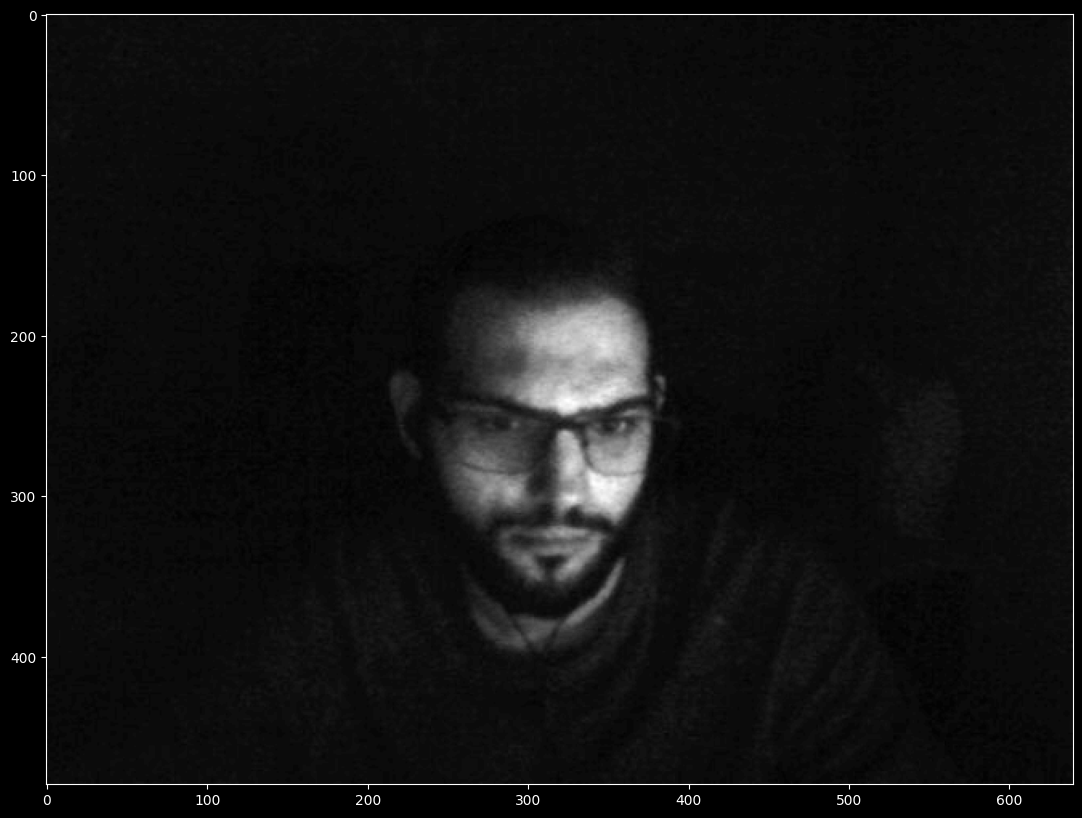

(40, 640)
(480, 640)
n, m 6 7
           4         4         3         4         4         4         4  \
0  -0.001469 -0.000947 -0.000466 -0.000614 -0.000911 -0.001173 -0.001130   
1  -0.001249  0.000105  0.000138 -0.000260 -0.000195 -0.000141 -0.000160   
2  -0.002443 -0.002609 -0.001973 -0.002429 -0.003012 -0.002715 -0.001640   
3   0.003059  0.002269  0.001704  0.001408  0.002225  0.002250  0.001885   
4   0.000645  0.002066  0.000545 -0.000166 -0.001517  0.000099 -0.000282   
5   0.002228 -0.000102  0.000146 -0.001751  0.000215  0.001965  0.000197   
6   0.001088  0.004106  0.006053  0.006249  0.002344 -0.000777 -0.001668   
7  -0.002467 -0.004001 -0.001281 -0.001050 -0.003389 -0.003514 -0.002164   
8  -0.001289  0.000341 -0.000366 -0.000912 -0.001650 -0.003209 -0.001707   
9  -0.008302 -0.003885  0.005979  0.001912 -0.002434 -0.000966 -0.002968   
10  0.000292 -0.011725 -0.011564 -0.011172 -0.001998  0.000349 -0.003045   
11  0.016150  0.008448  0.006731  0.005206 -0.004758 -0.00

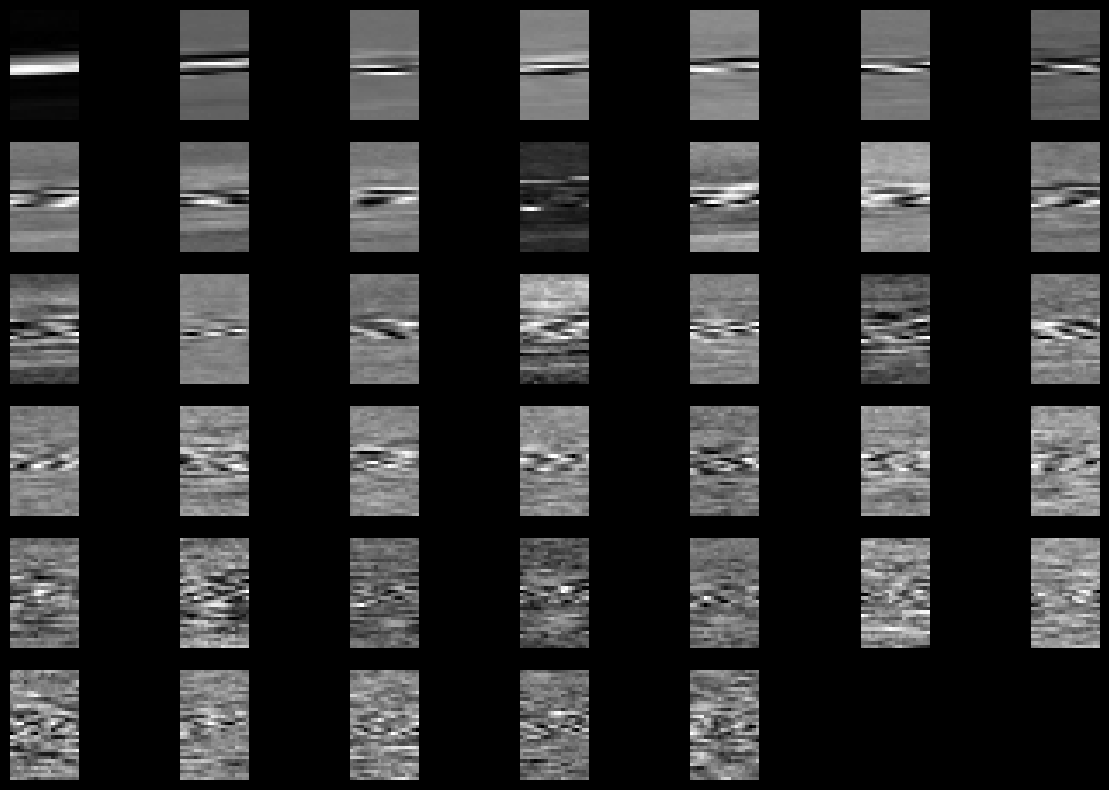

In [104]:
tImg = takeImage()
tImg = cv2.cvtColor(tImg, cv2.COLOR_BGR2GRAY)

# show taken image
plt.imshow(tImg, cmap='gray')
plt.show()

# convert taken image to eigenfaces
tEigen = convertToEigenFaces(tImg)
plt.show()

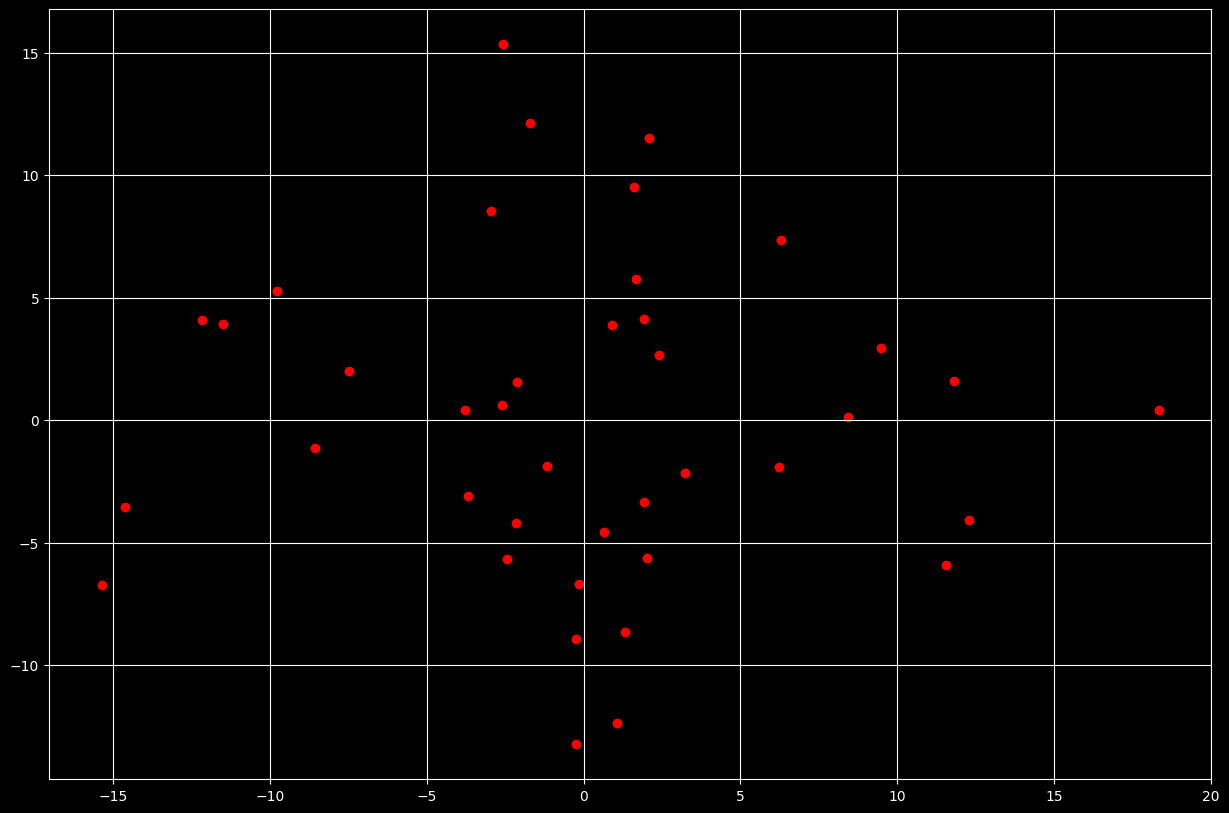

In [139]:
from sklearn.preprocessing import StandardScaler

# Reshape oEigen to 2D array
oEigen_2d = np.reshape(oEigen, (len(oEigen), -1))

# Standardize the data
scaler = StandardScaler()
oEigen_scaled = scaler.fit_transform(oEigen_2d)


# Reshape tEigen to 2D array
tEigen_2d = np.reshape(tEigen, (len(tEigen), -1))
scaler = StandardScaler()
tEigen_scaled = scaler.fit_transform(tEigen_2d)


pca = PCA()
pca.fit(tEigen_scaled, oEigen_scaled)

X_new = pca.transform(tEigen_scaled)
Y_new = pca.transform(oEigen_scaled)

plt.scatter(X_new[:, 0], Y_new[:, 1], c='red', label='Taken Image')
plt.grid()
plt.show()

